In [2]:
# ======================================================================
# 2.8. Итоговое задание
# ======================================================================

# Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, 
# чтобы на ранней стадии выявлять студентов, находящихся в группе риска.
# Для этого нужно построить модель, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы.

# Датасет - stud_math.csv

# ======================================================================
# 1. Импортируем необходимые библиотеки
# ======================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

# ======================================================================
# 2. Выполним первичный осмотр данных
# ======================================================================

# Установим настроечные пар-ры датасета
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

# Загрузим датасет и посмотрим на него
df_stud = pd.read_csv('stud_math.csv')
df_stud.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [3]:
# ======================================================================
# В датасете представлены следующие данные:

# school — аббревиатура школы, в которой учится ученик
# sex — пол ученика ('F' - женский, 'M' - мужской)
# age — возраст ученика (от 15 до 22)
# address — тип адреса ученика ('U' - городской, 'R' - за городом)
# famsize — размер семьи('LE3' <= 3, 'GT3' >3)

# Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
# Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
# Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
# Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
# Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

# reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
# guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
# traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
# studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
# failures — количество внеучебных неудач (n, если 1<=n<3, иначе 4)

# schoolsup — дополнительная образовательная поддержка (yes или no)
# famsup — семейная образовательная поддержка (yes или no)
# paid — дополнительные платные занятия по математике (yes или no)
# activities — дополнительные внеучебные занятия (yes или no)
# nursery — посещал детский сад (yes или no)

# higher — хочет получить высшее образование (yes или no)
# internet — наличие интернета дома (yes или no)
# romantic — в романтических отношениях (yes или no)
# famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
# freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

# goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
# health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
# absences — количество пропущенных занятий
# score — баллы по госэкзамену по математике
# ======================================================================

# Посмотрим на основные характеристики датасета
df_stud.info()

# ======================================================================
# Краткие выводы №1:
# В датасете содержится 13 числовых и 17 строковых столбцов
# в столбцах school, sex и age - не имеется пропусков; в остальных столбцах - пропуски имеются
# ======================================================================

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

In [4]:
# ======================================================================
# 3. Выполним первичный анализ данных в столбцах. Часть I
# ======================================================================

# Смотрим на столбцы school, sex, age и кол-во уникальных значений
print('Распределение аббревиатур школ:')
display(df_stud['school'].value_counts())
print('=' * 80)

print('Распределение девочек/мальчиков в подборке:')
display(df_stud['sex'].value_counts())
print('=' * 80)

print('Возрастное распределение в подборке:')
display(df_stud['age'].value_counts())
print('=' * 80)

# Отфильтруем столбцы (добавим None вместо пропусков)
# df_stud['address'] = df_stud['address'].apply(lambda x: None if x.strip() == '' else x)
# df_stud['famsize'] = df_stud['famsize'].apply(lambda x: None if x.strip() == '' else x)
df_stud['address'] = df_stud['address'].apply(lambda x: None if pd.isnull(x) else None if x == 'NaN' else x)
df_stud['famsize'] = df_stud['famsize'].apply(lambda x: None if pd.isnull(x) else None if x == 'NaN' else x)


# Смотрим на столбец address и распределение уникальных значений
print('Распределение типов адресов учащихся:')
display(df_stud['address'].value_counts())
print("Пропущенных значений в столбце address:", df_stud['address'].isnull().sum())
print('=' * 80)

# Смотрим на столбец famsize — размер семьи('LE3' <= 3, 'GT3' >3)
print('Распределение типов семей по их размеру:')
display(df_stud['famsize'].value_counts())
print("Пропущенных значений в столбце famsize:", df_stud['famsize'].isnull().sum())
print('=' * 80)

# ======================================================================
# Краткие выводы №2:
# В данных представлено всего 2 аббревиатуры школ, в к-ых учатся ученики, пустых значений нет
# В данных представлено всего 208 девочек и 187 мальчиков, пустых значений нет
# В данных представлено всего учеников с 15 до 19 лет, пустых значений нет
# В данных представлено всего 295 городских и 83 загородных типа адресов, непропущенных 378 значений, пропущенных 17
# В данных представлено всего 107 LE3 и 261 GT3 типа семей, непропущенных 368 значений, пропущенных 27
# ======================================================================
# !!! Столбцы, которые лучше преобразовать в dummy-переменные или в числовой тип, например, 
# sex = 1 - мальчик, 0 - девочка; 
# school = 1 - тип GP и 0 - тип MS;
# address = 1 - тип U и 0 - тип R (нужно решить, что делать с пропусками)
# famsize = 1 - тип LE3 и 0 - тип GT3 (нужно решить, что делать с пропусками)

Распределение аббревиатур школ:


GP    349
MS     46
Name: school, dtype: int64

Распределение девочек/мальчиков в подборке:


F    208
M    187
Name: sex, dtype: int64

Возрастное распределение в подборке:


16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

Распределение типов адресов учащихся:


U    295
R     83
Name: address, dtype: int64

Пропущенных значений в столбце address: 17
Распределение типов семей по их размеру:


GT3    261
LE3    107
Name: famsize, dtype: int64

Пропущенных значений в столбце famsize: 27


In [5]:
# Преобразуем символьные данные в поле 'school' в числовой тип
df_stud['school'] = df_stud['school'].apply(lambda x: int(x.replace('MS', '0')) if x == 'MS' 
                                      else int(x.replace('GP', '1')) if x == 'GP' else x)

# Проверим получившееся распределение
print('Распределение аббревиатур школ:')
display(df_stud['school'].value_counts())
print('=' * 80)
# ================================================================================

# Преобразуем символьные данные в поле 'sex' в числовой тип
df_stud['sex'] = df_stud['sex'].apply(lambda x: int(x.replace('F', '0')) if x == 'F' 
                                      else int(x.replace('M', '1')) if x == 'M' else x)
# Проверим получившееся распределение
print('Распределение девочек/мальчиков в подборке:')
display(df_stud['sex'].value_counts())
print('=' * 80)
# ================================================================================

# Преобразуем символьные данные в поле 'address' в числовой тип
df_stud['address'] = df_stud['address'].apply(lambda x: int(x.replace('R', '0')) if x == 'R' 
                                      else int(x.replace('U', '1')) if x == 'U' else x)
# Проверим получившееся распределение
print('Распределение типов адресов учащихся:')
display(df_stud['address'].value_counts())
print("Пропущенных значений в столбце address:", df_stud['address'].isnull().sum())
print('=' * 80)
# ================================================================================

# Преобразуем символьные данные в поле 'famsize' в числовой тип
df_stud['famsize'] = df_stud['famsize'].apply(lambda x: int(x.replace('GT3', '0')) if x == 'GT3' 
                                      else int(x.replace('LE3', '1')) if x == 'LE3' else x)
# Проверим получившееся распределение
print('Распределение типов семей по их размеру:')
display(df_stud['famsize'].value_counts())
print("Пропущенных значений в столбце famsize:", df_stud['famsize'].isnull().sum())
print('=' * 80)
# ================================================================================

Распределение аббревиатур школ:


1    349
0     46
Name: school, dtype: int64

Распределение девочек/мальчиков в подборке:


0    208
1    187
Name: sex, dtype: int64

Распределение типов адресов учащихся:


1.0    295
0.0     83
Name: address, dtype: int64

Пропущенных значений в столбце address: 17
Распределение типов семей по их размеру:


0.0    261
1.0    107
Name: famsize, dtype: int64

Пропущенных значений в столбце famsize: 27


In [6]:
# Отфильтруем столбцы (добавим None вместо пропусков)
df_stud['Pstatus'] = df_stud['Pstatus'].apply(lambda x: None if pd.isnull(x) else None if x == 'NaN' else x)
df_stud['Medu'] = df_stud['Medu'].apply(lambda x: None if pd.isnull(x) else None if x == 'NaN' else x)
df_stud['Fedu'] = df_stud['Fedu'].apply(lambda x: None if pd.isnull(x) else None if x == 'NaN' else x)
df_stud['Mjob'] = df_stud['Mjob'].apply(lambda x: None if pd.isnull(x) else None if x == 'NaN' else x)
df_stud['Fjob'] = df_stud['Fjob'].apply(lambda x: None if pd.isnull(x) else None if x == 'NaN' else x)

# Смотрим на столбец Pstatus и распределение 'T' - живут вместе 'A' - раздельно
print('Распределение статусов совместного жилья родителей:')
display(df_stud['Pstatus'].value_counts())
print("Пропущенных значений в столбце Pstatus:", df_stud['Pstatus'].isnull().sum())
print('=' * 80)

# Смотрим на столбец Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
print('Распределение Образование матери:')
display(df_stud['Medu'].value_counts())
print("Пропущенных значений в столбце Medu:", df_stud['Medu'].isnull().sum())
print('=' * 80)

# Смотрим на столбец Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
print('Распределение Образование отца:')
display(df_stud['Fedu'].value_counts())
print("Пропущенных значений в столбце Fedu:", df_stud['Fedu'].isnull().sum())
print('=' * 80)

# Смотрим на столбец Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
print('Распределение Работа матери:')
display(df_stud['Mjob'].value_counts())
print("Пропущенных значений в столбце Mjob:", df_stud['Mjob'].isnull().sum())
print('=' * 80)

# Смотрим на столбец Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
print('Распределение Работа отца:')
display(df_stud['Fjob'].value_counts())
print("Пропущенных значений в столбце Fjob:", df_stud['Fjob'].isnull().sum())
print('=' * 80)

# ======================================================================
# Краткие выводы №3:
# В данных Pstatus представлено 2 статуса жилья родителей ('T' - живут вместе 'A' - раздельно), пропущенных 45
# В данных Medu представлено 4 статуса образования матери, пропущенных 3 значения
# В данных Fedu представлено 4 статуса образования отца, пропущенных 24 значения и 1 явная ошибка - число 40
# В данных Mjob представлено 5 статусов работы матери, пропущенных 19 значений
# В данных Fjob представлено 5 статусов работы отца, пропущенных 36 значений

# ======================================================================
# !!! Столбцы, которые лучше преобразовать в dummy-переменные или числовой тип, например, 
# Pstatus = 1 - живут вместе, 0 - раздельно; 
# Medu = 0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее; 
# Fedu = 0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее;
# Mjob = 0 - 'teacher', 1 - 'health', 2 - 'services', 3 - 'at_home', 4 - 'other'
# Fjob = 0 - 'teacher', 1 - 'health', 2 - 'services', 3 - 'at_home', 4 - 'other'

Распределение статусов совместного жилья родителей:


T    314
A     36
Name: Pstatus, dtype: int64

Пропущенных значений в столбце Pstatus: 45
Распределение Образование матери:


4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

Пропущенных значений в столбце Medu: 3
Распределение Образование отца:


2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

Пропущенных значений в столбце Fedu: 24
Распределение Работа матери:


other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

Пропущенных значений в столбце Mjob: 19
Распределение Работа отца:


other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

Пропущенных значений в столбце Fjob: 36


In [7]:
# Преобразуем символьные данные в поле 'Pstatus' в числовой тип
df_stud['Pstatus'] = df_stud['Pstatus'].apply(lambda x: int(x.replace('A', '0')) if x == 'A' 
                                      else int(x.replace('T', '1')) if x == 'T' else x)
# Проверим получившееся распределение
print('Распределение статусов совместного жилья родителей:')
display(df_stud['Pstatus'].value_counts())
print("Пропущенных значений в столбце Pstatus:", df_stud['Pstatus'].isnull().sum())
print('=' * 80)
# ======================================================================

# В данных Fedu представлено 4 статуса образования отца, пропущенных 24 значения и 1 явная ошибка - число 40
# Исправим ошибку в поле 'Fedu'
df_stud['Fedu'] = df_stud['Fedu'].apply(lambda x: int(4) if x == 40 else x)

# Проверим получившееся распределение
print('Распределение Образование отца:')
display(df_stud['Fedu'].value_counts())
print("Пропущенных значений в столбце Fedu:", df_stud['Fedu'].isnull().sum())
print('=' * 80)
# ======================================================================

# Преобразуем символьные данные в поле 'Mjob' в числовой тип
df_stud['Mjob'] = df_stud['Mjob'].apply(lambda x: int(x.replace('teacher', '0')) if x == 'teacher' 
                                        else int(x.replace('health', '1')) if x == 'health'
                                        else int(x.replace('services', '2')) if x == 'services'
                                        else int(x.replace('at_home', '3')) if x == 'at_home'
                                        else int(x.replace('other', '4')) if x == 'other' else x)
# Проверим получившееся распределение
print('Распределение Работа матери:')
display(df_stud['Mjob'].value_counts())
print("Пропущенных значений в столбце Mjob:", df_stud['Mjob'].isnull().sum())
print('=' * 80)
# ======================================================================

# Преобразуем символьные данные в поле 'Fjob' в числовой тип
df_stud['Fjob'] = df_stud['Fjob'].apply(lambda x: int(x.replace('teacher', '0')) if x == 'teacher' 
                                        else int(x.replace('health', '1')) if x == 'health'
                                        else int(x.replace('services', '2')) if x == 'services'
                                        else int(x.replace('at_home', '3')) if x == 'at_home'
                                        else int(x.replace('other', '4')) if x == 'other' else x)
# Проверим получившееся распределение
print('Распределение Работа отца:')
display(df_stud['Fjob'].value_counts())
print("Пропущенных значений в столбце Fjob:", df_stud['Fjob'].isnull().sum())
print('=' * 80)
# ======================================================================

Распределение статусов совместного жилья родителей:


1.0    314
0.0     36
Name: Pstatus, dtype: int64

Пропущенных значений в столбце Pstatus: 45
Распределение Образование отца:


2.0    106
3.0     96
4.0     89
1.0     78
0.0      2
Name: Fedu, dtype: int64

Пропущенных значений в столбце Fedu: 24
Распределение Работа матери:


4.0    133
2.0     98
3.0     58
0.0     55
1.0     32
Name: Mjob, dtype: int64

Пропущенных значений в столбце Mjob: 19
Распределение Работа отца:


4.0    197
2.0    102
0.0     29
3.0     16
1.0     15
Name: Fjob, dtype: int64

Пропущенных значений в столбце Fjob: 36


In [8]:
# Посмотрим на основные характеристики датасета
df_stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null int64
sex                    395 non-null int64
age                    395 non-null int64
address                378 non-null float64
famsize                368 non-null float64
Pstatus                350 non-null float64
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null float64
Fjob                   359 non-null float64
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 n

In [9]:
# ================================================================================
# Продолжаем делать первичный анализ данных в столбцах. Часть I
# ================================================================================

# Отфильтруем столбец (добавим None вместо пропусков)
df_stud['reason'] = df_stud['reason'].apply(lambda x: None if pd.isnull(x) else None if x == 'NaN' else x)

# Смотрим на столбец reason и распределение уникальных значений
print('Распределение причины выбора школы:')
display(df_stud['reason'].value_counts())
print("Пропущенных значений в столбце reason:", df_stud['reason'].isnull().sum())
print('=' * 80)

# Преобразуем символьные данные в поле 'reason' в числовой тип
# reason = 0 - 'home', 1 - 'reputation', 2 - 'course', 3 - 'other'
df_stud['reason'] = df_stud['reason'].apply(lambda x: int(x.replace('home', '0')) if x == 'home' 
                                            else int(x.replace('reputation', '1')) if x == 'reputation'
                                            else int(x.replace('course', '2')) if x == 'course'
                                            else int(x.replace('other', '3')) if x == 'other' else x)
# Проверим получившееся распределение
print('Распределение причины выбора школы:')
display(df_stud['reason'].value_counts())
print("Пропущенных значений в столбце reason:", df_stud['reason'].isnull().sum())
print('=' * 80)
# ================================================================================

Распределение причины выбора школы:


course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

Пропущенных значений в столбце reason: 17
Распределение причины выбора школы:


2.0    137
0.0    104
1.0    103
3.0     34
Name: reason, dtype: int64

Пропущенных значений в столбце reason: 17


In [10]:
# Отфильтруем столбец (добавим None вместо пропусков)
df_stud['guardian'] = df_stud['guardian'].apply(lambda x: None if pd.isnull(x) else None if x == 'NaN' else x)

# Смотрим на столбец guardian и распределение уникальных значений
print('Распределение типов опекунов:')
display(df_stud['guardian'].value_counts())
print("Пропущенных значений в столбце guardian:", df_stud['guardian'].isnull().sum())
print('=' * 80)

# Преобразуем символьные данные в поле 'guardian' в числовой тип
# guardian = 0 - 'mother', 1 - 'father', 2 - 'other'
df_stud['guardian'] = df_stud['guardian'].apply(lambda x: int(x.replace('mother', '0')) if x == 'mother' 
                                            else int(x.replace('father', '1')) if x == 'father'
                                            else int(x.replace('other', '2')) if x == 'other' else x)
# Проверим получившееся распределение
print('Распределение типов опекунов:')
display(df_stud['guardian'].value_counts())
print("Пропущенных значений в столбце guardian:", df_stud['guardian'].isnull().sum())
print('=' * 80)
# ================================================================================

Распределение типов опекунов:


mother    250
father     86
other      28
Name: guardian, dtype: int64

Пропущенных значений в столбце guardian: 31
Распределение типов опекунов:


0.0    250
1.0     86
2.0     28
Name: guardian, dtype: int64

Пропущенных значений в столбце guardian: 31


In [11]:
# Отфильтруем столбцы (добавим None вместо пропусков)
df_stud['traveltime'] = df_stud['traveltime'].apply(lambda x: None if pd.isnull(x) else None if x == 'NaN' else x)
df_stud['studytime'] = df_stud['studytime'].apply(lambda x: None if pd.isnull(x) else None if x == 'NaN' else x)
df_stud['failures'] = df_stud['failures'].apply(lambda x: None if pd.isnull(x) else None if x == 'NaN' else x)

# Смотрим на столбец traveltime и распределение уникальных значений
# traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
print('Распределение времени в пути до школы:')
display(df_stud['traveltime'].value_counts())
print("Пропущенных значений в столбце traveltime:", df_stud['traveltime'].isnull().sum())
print('=' * 80)

# Смотрим на столбец studytime и распределение уникальных значений
# studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
print('Распределение времени на учёбу помимо школы в неделю:')
display(df_stud['studytime'].value_counts())
print("Пропущенных значений в столбце studytime:", df_stud['studytime'].isnull().sum())
print('=' * 80)

# Смотрим на столбец failures и распределение уникальных значений
# failures — количество внеучебных неудач (n, если 1<=n<3, иначе 4)
print('Распределение количества внеучебных неудач:')
display(df_stud['failures'].value_counts())
print("Пропущенных значений в столбце failures:", df_stud['failures'].isnull().sum())
print('=' * 80)

# ======================================================================
# Краткие выводы №3:
# Преобразовали символьные данные в поле 'reason' в числовой тип, 17 - пропусков в данных содержится
# Преобразовали символьные данные в поле 'guardian' в числовой тип, 31 - пропусков в данных содержится
# Поскольку признаки traveltime, studytime и failures уже в числовом формате, просто сделали предварительную фильтрацию 
# и зафиксировали их распределение, а также кол-во пропущенных в данных значений

Распределение времени в пути до школы:


1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

Пропущенных значений в столбце traveltime: 28
Распределение времени на учёбу помимо школы в неделю:


2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

Пропущенных значений в столбце studytime: 7
Распределение количества внеучебных неудач:


0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

Пропущенных значений в столбце failures: 22


In [12]:
# Отфильтруем столбцы (добавим None вместо пропусков)
df_stud['schoolsup'] = df_stud['schoolsup'].apply(lambda x: None if pd.isnull(x) else None if x == 'NaN' else x)
df_stud['famsup'] = df_stud['famsup'].apply(lambda x: None if pd.isnull(x) else None if x == 'NaN' else x)
df_stud['paid'] = df_stud['paid'].apply(lambda x: None if pd.isnull(x) else None if x == 'NaN' else x)
df_stud['activities'] = df_stud['activities'].apply(lambda x: None if pd.isnull(x) else None if x == 'NaN' else x)
df_stud['nursery'] = df_stud['nursery'].apply(lambda x: None if pd.isnull(x) else None if x == 'NaN' else x)

# Смотрим на столбец schoolsup и распределение уникальных значений
print('Распределение дополнительной образовательной поддержки:')
display(df_stud['schoolsup'].value_counts())
print("Пропущенных значений в столбце schoolsup:", df_stud['schoolsup'].isnull().sum())
print('=' * 80)

# Преобразуем символьные данные в поле 'schoolsup' в числовой тип
# schoolsup = 0 - 'no', 1 - 'yes'
df_stud['schoolsup'] = df_stud['schoolsup'].apply(lambda x: int(x.replace('no', '0')) if x == 'no' 
                                            else int(x.replace('yes', '1')) if x == 'yes' else x)
# Проверим получившееся распределение
print('Распределение дополнительной образовательной поддержки:')
display(df_stud['schoolsup'].value_counts())
print("Пропущенных значений в столбце schoolsup:", df_stud['schoolsup'].isnull().sum())
print('=' * 80)
# ================================================================================

Распределение дополнительной образовательной поддержки:


no     335
yes     51
Name: schoolsup, dtype: int64

Пропущенных значений в столбце schoolsup: 9
Распределение дополнительной образовательной поддержки:


0.0    335
1.0     51
Name: schoolsup, dtype: int64

Пропущенных значений в столбце schoolsup: 9


In [13]:
# Смотрим на столбец famsup и распределение уникальных значений
print('Распределение семейной образовательной поддержки:')
display(df_stud['famsup'].value_counts())
print("Пропущенных значений в столбце famsup:", df_stud['famsup'].isnull().sum())
print('=' * 80)

# Преобразуем символьные данные в поле 'famsup' в числовой тип
# famsup = 0 - 'no', 1 - 'yes'
df_stud['famsup'] = df_stud['famsup'].apply(lambda x: int(x.replace('no', '0')) if x == 'no' 
                                            else int(x.replace('yes', '1')) if x == 'yes' else x)
# Проверим получившееся распределение
print('Распределение семейной образовательной поддержки:')
display(df_stud['famsup'].value_counts())
print("Пропущенных значений в столбце famsup:", df_stud['famsup'].isnull().sum())
print('=' * 80)
# ================================================================================

Распределение семейной образовательной поддержки:


yes    219
no     137
Name: famsup, dtype: int64

Пропущенных значений в столбце famsup: 39
Распределение семейной образовательной поддержки:


1.0    219
0.0    137
Name: famsup, dtype: int64

Пропущенных значений в столбце famsup: 39


In [14]:
# Смотрим на столбец paid и распределение уникальных значений
print('Распределение дополнительных платных занятий:')
display(df_stud['paid'].value_counts())
print("Пропущенных значений в столбце paid:", df_stud['paid'].isnull().sum())
print('=' * 80)

# Преобразуем символьные данные в поле 'famsup' в числовой тип
# paid = 0 - 'no', 1 - 'yes'
df_stud['paid'] = df_stud['paid'].apply(lambda x: int(x.replace('no', '0')) if x == 'no' 
                                            else int(x.replace('yes', '1')) if x == 'yes' else x)
# Проверим получившееся распределение
print('Распределение дополнительных платных занятий:')
display(df_stud['paid'].value_counts())
print("Пропущенных значений в столбце paid:", df_stud['paid'].isnull().sum())
print('=' * 80)
# ================================================================================

Распределение дополнительных платных занятий:


no     200
yes    155
Name: paid, dtype: int64

Пропущенных значений в столбце paid: 40
Распределение дополнительных платных занятий:


0.0    200
1.0    155
Name: paid, dtype: int64

Пропущенных значений в столбце paid: 40


In [15]:
# Смотрим на столбец activities и распределение уникальных значений
print('Распределение дополнительных внеучебных занятий:')
display(df_stud['activities'].value_counts())
print("Пропущенных значений в столбце activities:", df_stud['activities'].isnull().sum())
print('=' * 80)

# Преобразуем символьные данные в поле 'famsup' в числовой тип
# activities = 0 - 'no', 1 - 'yes'
df_stud['activities'] = df_stud['activities'].apply(lambda x: int(x.replace('no', '0')) if x == 'no' 
                                            else int(x.replace('yes', '1')) if x == 'yes' else x)
# Проверим получившееся распределение
print('Распределение дополнительных внеучебных занятий:')
display(df_stud['activities'].value_counts())
print("Пропущенных значений в столбце activities:", df_stud['activities'].isnull().sum())
print('=' * 80)
# ================================================================================

Распределение дополнительных внеучебных занятий:


yes    195
no     186
Name: activities, dtype: int64

Пропущенных значений в столбце activities: 14
Распределение дополнительных внеучебных занятий:


1.0    195
0.0    186
Name: activities, dtype: int64

Пропущенных значений в столбце activities: 14


In [16]:
# Смотрим на столбец nursery и распределение уникальных значений
print('Распределение вариантов посещения детсада:')
display(df_stud['nursery'].value_counts())
print("Пропущенных значений в столбце nursery:", df_stud['nursery'].isnull().sum())
print('=' * 80)

# Преобразуем символьные данные в поле 'famsup' в числовой тип
# nursery = 0 - 'no', 1 - 'yes'
df_stud['nursery'] = df_stud['nursery'].apply(lambda x: int(x.replace('no', '0')) if x == 'no' 
                                            else int(x.replace('yes', '1')) if x == 'yes' else x)
# Проверим получившееся распределение
print('Распределение вариантов посещения детсада:')
display(df_stud['nursery'].value_counts())
print("Пропущенных значений в столбце nursery:", df_stud['nursery'].isnull().sum())
print('=' * 80)
# ================================================================================
# Краткие выводы №4:
# Преобразовали данные типа yes/no в поле 'schoolsup' в числовой тип, 9 - пропусков в данных содержится
# Преобразовали данные типа yes/no в поле 'famsup' в числовой тип, 39 - пропусков в данных содержится
# Преобразовали данные типа yes/no в поле 'paid' в числовой тип, 40 - пропусков в данных содержится
# Преобразовали данные типа yes/no в поле 'activities' в числовой тип, 14 - пропусков в данных содержится
# Преобразовали данные типа yes/no в поле 'nursery' в числовой тип, 16 - пропусков в данных содержится

# !!! Поскольку признаки schoolsup, famsup, paid, activities и nursery содержат пропуски, может быть следует внести
# код 3 - для пропущенных ответов, подразумевая ответ "не помню или не хочу говорить"

Распределение вариантов посещения детсада:


yes    300
no      79
Name: nursery, dtype: int64

Пропущенных значений в столбце nursery: 16
Распределение вариантов посещения детсада:


1.0    300
0.0     79
Name: nursery, dtype: int64

Пропущенных значений в столбце nursery: 16


In [17]:
# ================================================================================
# Продолжаем делать первичный анализ данных в столбцах. Часть I
# ================================================================================

# Отфильтруем столбцы (добавим None вместо пропусков)
df_stud['higher'] = df_stud['higher'].apply(lambda x: None if x == 'NaN' else x)
df_stud['internet'] = df_stud['internet'].apply(lambda x: None if x == 'NaN' else x)
df_stud['freetime'] = df_stud['freetime'].apply(lambda x: None if x == 'NaN' else x)
df_stud['famrel'] = df_stud['famrel'].apply(lambda x: None if pd.isnull(x) else None if x == 'NaN' else x)
df_stud['freetime'] = df_stud['freetime'].apply(lambda x: None if pd.isnull(x) else None if x == 'NaN' else x)
df_stud['goout'] = df_stud['goout'].apply(lambda x: None if pd.isnull(x) else None if x == 'NaN' else x)
df_stud['health'] = df_stud['health'].apply(lambda x: None if pd.isnull(x) else None if x == 'NaN' else x)
df_stud['absences'] = df_stud['absences'].apply(lambda x: None if pd.isnull(x) else None if x == 'NaN' else x)
df_stud['score'] = df_stud['score'].apply(lambda x: None if pd.isnull(x) else None if x == 'NaN' else x)

# Смотрим на столбец higher и распределение уникальных значений
print('Распределение вариантов желания получать высшее образование:')
display(df_stud['higher'].value_counts())
print("Пропущенных значений в столбце higher:", df_stud['higher'].isnull().sum())
print('=' * 80)

# Преобразуем символьные данные в поле 'higher' в числовой тип
# higher = 0 - 'no', 1 - 'yes'
df_stud['higher'] = df_stud['higher'].apply(lambda x: int(x.replace('no', '0')) if x == 'no' 
                                            else int(x.replace('yes', '1')) if x == 'yes' else x)
# Проверим получившееся распределение
print('Распределение вариантов желания получать высшее образование:')
display(df_stud['higher'].value_counts())
print("Пропущенных значений в столбце higher:", df_stud['higher'].isnull().sum())
print('=' * 80)
# ================================================================================

Распределение вариантов желания получать высшее образование:


yes    356
no      19
Name: higher, dtype: int64

Пропущенных значений в столбце higher: 20
Распределение вариантов желания получать высшее образование:


1.0    356
0.0     19
Name: higher, dtype: int64

Пропущенных значений в столбце higher: 20


In [18]:
# Смотрим на столбец internet и распределение уникальных значений
print('Распределение наличия дома интернета:')
display(df_stud['internet'].value_counts())
print("Пропущенных значений в столбце internet:", df_stud['internet'].isnull().sum())
print('=' * 80)

# Преобразуем символьные данные в поле 'internet' в числовой тип
# internet = 0 - 'no', 1 - 'yes'
df_stud['internet'] = df_stud['internet'].apply(lambda x: int(x.replace('no', '0')) if x == 'no' 
                                            else int(x.replace('yes', '1')) if x == 'yes' else x)
# Проверим получившееся распределение
print('Распределение наличия дома интернета:')
display(df_stud['internet'].value_counts())
print("Пропущенных значений в столбце internet:", df_stud['internet'].isnull().sum())
print('=' * 80)
# ================================================================================

Распределение наличия дома интернета:


yes    305
no      56
Name: internet, dtype: int64

Пропущенных значений в столбце internet: 34
Распределение наличия дома интернета:


1.0    305
0.0     56
Name: internet, dtype: int64

Пропущенных значений в столбце internet: 34


In [19]:
# Смотрим на столбец romantic и распределение уникальных значений
print('Распределение наличия романтических отношений:')
display(df_stud['romantic'].value_counts())
print("Пропущенных значений в столбце romantic:", df_stud['romantic'].isnull().sum())
print('=' * 80)

# Преобразуем символьные данные в поле 'romantic' в числовой тип
# romantic = 0 - 'no', 1 - 'yes'
df_stud['romantic'] = df_stud['romantic'].apply(lambda x: int(x.replace('no', '0')) if x == 'no' 
                                            else int(x.replace('yes', '1')) if x == 'yes' else x)
# Проверим получившееся распределение
print('Распределение наличия романтических отношений:')
display(df_stud['romantic'].value_counts())
print("Пропущенных значений в столбце romantic:", df_stud['romantic'].isnull().sum())
print('=' * 80)
# ================================================================================

Распределение наличия романтических отношений:


no     240
yes    124
Name: romantic, dtype: int64

Пропущенных значений в столбце romantic: 31
Распределение наличия романтических отношений:


0.0    240
1.0    124
Name: romantic, dtype: int64

Пропущенных значений в столбце romantic: 31


In [20]:
# Смотрим на столбец famrel и распределение уникальных значений
print('Распределение оценок семейных отношений:')
display(df_stud['famrel'].value_counts())
print("Пропущенных значений в столбце famrel:", df_stud['famrel'].isnull().sum())
print('=' * 80)
# ================================================================================

# Смотрим на столбец freetime и распределение уникальных значений
print('Распределение оценок свободного времени:')
display(df_stud['freetime'].value_counts())
print("Пропущенных значений в столбце freetime:", df_stud['freetime'].isnull().sum())
print('=' * 80)
# ================================================================================

# Смотрим на столбец goout и распределение уникальных значений
print('Распределение оценок проведения времени с друзьями:')
display(df_stud['goout'].value_counts())
print("Пропущенных значений в столбце goout:", df_stud['goout'].isnull().sum())
print('=' * 80)
# ================================================================================

# Смотрим на столбец health и распределение уникальных значений
print('Распределение текущего состояния здоровья:')
display(df_stud['health'].value_counts())
print("Пропущенных значений в столбце health:", df_stud['health'].isnull().sum())
print('=' * 80)
# ================================================================================

# Смотрим на столбец absences и распределение уникальных значений
print('Распределение кол-ва пропущенных занятий:')
display(df_stud['absences'].value_counts())
print("Пропущенных значений в столбце absences:", df_stud['absences'].isnull().sum())
print('=' * 80)
# ================================================================================

# Смотрим на столбец score и распределение уникальных значений
print('Распределение баллов по госэкзамену по математике:')
display(df_stud['score'].value_counts())
print("Пропущенных значений в столбце score:", df_stud['score'].isnull().sum())
print('=' * 80)
# ================================================================================

Распределение оценок семейных отношений:


 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

Пропущенных значений в столбце famrel: 27
Распределение оценок свободного времени:


3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

Пропущенных значений в столбце freetime: 11
Распределение оценок проведения времени с друзьями:


3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

Пропущенных значений в столбце goout: 8
Распределение текущего состояния здоровья:


5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

Пропущенных значений в столбце health: 15
Распределение кол-ва пропущенных занятий:


0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

Пропущенных значений в столбце absences: 12
Распределение баллов по госэкзамену по математике:


50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

Пропущенных значений в столбце score: 6


count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

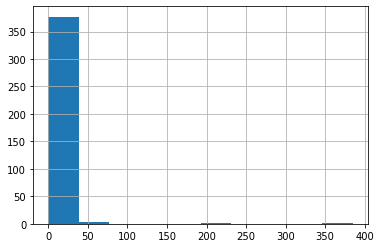

In [21]:
# Посмотрим на распределение кол-ва пропущенных занятий
df_stud['absences'].hist()
df_stud['absences'].describe()

# Можно сделать предположение, что больше 50, 200 и 350 занятий было пропущено по болезни
# Наверное, с absences можно поработать углубленнее, например, ввести градацию:
# - допустимое кол-во пропусков (для этого определить 80 - 85% студентов, к-ые в них попадают);
# - удовлетворительное кол-во пропусков;
# - неудовлетворительное кол-во пропусков;

count    388.000000
mean      -6.115979
std        2.526235
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64

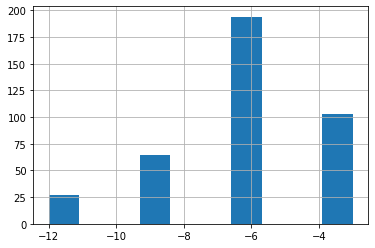

In [22]:
df_stud['studytime, granular'].hist()
df_stud['studytime, granular'].describe()

# предварительно можно утверждать, что 'studytime, granular' и 'studytime' скоррелированы м/у собой и отражают величину 
# отводимого времени на учебу каждым учащимся, следовательно, столбец 'studytime, granular' можно будет выбросить для прогноза

In [24]:
# воспользуемся корреляционным анализом для подтверждения того, что столбцы "studytime" и "studytime, granular" обратно скоррелированы
# и можно с уверенностью удалить один из столбцов
df_stud.corr()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
school,1.000000,0.012286,-0.377610,0.287661,-0.059139,-0.071655,0.133708,0.090249,-0.067259,0.036609,-0.129276,-0.031233,-0.254034,0.092700,-0.059999,0.139951,0.185591,0.030892,0.114399,0.108543,-0.092700,0.031343,0.102274,-0.060194,0.031147,-0.035052,0.006257,0.037339,-0.013642,0.044524
sex,0.012286,1.000000,-0.028606,0.001084,0.099341,0.039071,0.080375,0.029563,-0.115429,-0.014959,-0.003089,-0.015028,0.049019,-0.307566,0.040279,-0.138649,-0.162145,-0.107899,0.109267,0.004051,0.307566,-0.153372,0.059940,-0.134497,0.051463,0.232925,0.085922,0.137609,-0.037964,0.099285
age,-0.377610,-0.028606,1.000000,-0.147902,0.022638,0.015458,-0.161704,-0.163670,0.101858,0.045653,0.007814,0.255268,0.081508,-0.015556,0.228047,-0.256343,-0.159311,-0.030502,-0.110231,-0.106453,0.015556,-0.207837,-0.108964,0.144440,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
address,0.287661,0.001084,-0.147902,1.000000,0.058109,-0.064629,0.153189,0.085408,-0.098002,-0.026320,-0.129983,0.092095,-0.285782,-0.045182,-0.101835,0.036284,0.025894,0.052925,-0.052115,0.052285,0.045182,0.052799,0.209745,-0.010859,-0.017216,0.055708,0.063285,-0.049985,0.025661,0.120067
famsize,-0.059139,0.099341,0.022638,0.058109,1.000000,-0.078822,-0.055857,-0.087404,-0.105319,0.041150,-0.008324,-0.069513,0.041872,-0.086096,0.002320,-0.033654,-0.122649,-0.083343,-0.025908,0.103838,0.086096,-0.027185,-0.004640,0.016508,-0.017231,0.026207,0.028745,-0.048005,0.016183,0.063324
Pstatus,-0.071655,0.039071,0.015458,-0.064629,-0.078822,1.000000,-0.131697,-0.111747,-0.008334,0.041729,0.063636,0.022706,0.081029,0.007697,0.011092,-0.035225,-0.027150,0.040650,0.104314,-0.065641,-0.007697,-0.029150,0.059023,-0.049715,0.016626,0.057306,0.038323,0.005176,-0.108210,-0.045985
Medu,0.133708,0.080375,-0.161704,0.153189,-0.055857,-0.131697,1.000000,0.625516,-0.530680,-0.214541,-0.025861,-0.144894,-0.173515,0.078589,-0.245463,-0.042360,0.207429,0.178744,0.106883,0.188484,-0.078589,0.176596,0.208719,0.023870,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,0.090249,0.029563,-0.163670,0.085408,-0.087404,-0.111747,0.625516,1.000000,-0.343396,-0.353811,-0.036332,-0.001328,-0.145349,0.012896,-0.272882,0.050031,0.219144,0.101455,0.113534,0.162113,-0.012896,0.187323,0.133716,0.010062,-0.022486,-0.025892,0.042663,0.023862,0.022572,0.130923
Mjob,-0.067259,-0.115429,0.101858,-0.098002,-0.105319,-0.008334,-0.530680,-0.343396,1.000000,0.278012,-0.088048,0.145991,0.100810,0.011648,0.106308,0.105845,-0.162336,-0.196271,-0.121462,-0.152127,-0.011648,-0.072780,-0.162356,0.077651,0.057919,-0.073691,-0.013283,-0.042425,-0.009444,-0.137513
Fjob,0.036609,-0.014959,0.045653,-0.026320,0.041150,0.041729,-0.214541,-0.353811,0.278012,1.000000,-0.113242,-0.059411,0.076196,-0.001395,-0.010950,-0.088847,-0.053694,0.024421,-0.041253,-0.086066,0.001395,0.034300,-0.028359,-0.058518,0.037815,0.020550,0.009104,-0.025148,-0.118501,-0.072275


In [ ]:
# ================================================================================
# Краткие выводы №5:
# Преобразовали данные типа yes/no в поле 'higher' в числовой тип, 20 - пропусков в данных содержится
# Преобразовали данные типа yes/no в поле 'internet' в числовой тип, 34 - пропусков в данных содержится
# Преобразовали данные типа yes/no в поле 'romantic' в числовой тип, 31 - пропусков в данных содержится

# !!! Поскольку признаки schoolsup, famsup, paid, activities и nursery относятся к типу "yes/no ответов" и содержат пропуски, 
# может быть следует внести код 3 - для пропущенных ответов, подразумевая ответ "не помню или не хочу говорить"

# В поле famrel содержится одна ошибка -1, к-ую необходимо исправить, 27 - пропусков в данных содержится
# В поле freetime имеется 11 пропусков в данных
# В поле goout имеется 8 пропусков в данных

# В поле absences имеется 8 пропусков в данных:
# Можно сделать предположение, что больше 50, 200 и 350 занятий было пропущено по болезни
# Наверное, с absences можно поработать углубленнее, например, ввести градацию:
# - допустимое кол-во пропусков (для этого определить 80 - 85% студентов, к-ые в них попадают);
# - удовлетворительное кол-во пропусков;
# - неудовлетворительное кол-во пропусков;

# !!! Поскольку признаки health, goout, freetime  достаточно сложно оценить самим учащимся, 
# возможно также следует внести код 0 - для пропущенных ответов, подразумевая ответ "не могу определить или не хочу говорить"
# ================================================================================
# ================================================================================
# !!! Итого имеем следующую картину по датасету и принятые допущения:
# ================================================================================
# ================================================================================
# 1) поля (таковых у нас 8) с ответами типа "yes/no", к-ые содержат пропуски необходимо заменить на код 3 - подразумевая, 
# что учащийся воздержался от ответа или затрудняется ответить

# 2) пропуски в полях состояние здоровья (health) и было ли достаточно времени на прогулки и общение с друзьями (goout) 
# тоже необходимо заменить на код 6 - подразумевая ответ "не могу определить или не хочу об этом говорить"

# 3) пропуски в полях работа матери и отца - 'Mjob' и 'Fjob' следует заменить на код значения "other" - подразумевая ответ "не хочу говорить"

# 4) пропуски в полях образование матери и отца - 'Medu' и 'Fedu' следует заменить на код значения "other" - подразумевая ответ "не знаю",
# посколько дети, действительно, и это видно по данным могут забыть или вовсе не знать, какое у отца образование

# 5) пропуски в поле reason — причина выбора школы следует заменить на код значения "other" - подразумевая ответ "затрудняюсь ответить или не хочу говорить"

# 6) числовые показатели пропущенных занятий в поле 'absences' следует сжать до 3-х - 5 градаций:
# например, 0 - допустимое кол-во пропусков;  1 - удовлетворительное кол-во пропусков; 2 - неудовлетворительное кол-во пропусков;

# 7) пропуски в поле 'Pstatus' следует заменить на код 3 - подразумевая состояние семьи "other" имея в виду, 
# что члены семьи формально могут жить вместе, но отношения неудовлетворительные или похожи на раздельные

# 8) пропуски в поле опекун 'guardian' следует заменить на код 3 - подразумевая ответ "other"

# 9) столбец 'studytime, granular' следует совсем удалить, поскольку он обратно скоррелирован с 'studytime'

# 10) строки, к-ые содержат пропуски в поле 'score' следует совсем удалить из датасета, поскольку итоговой оценки нет
# ================================================================================
# ================================================================================
# Исправления сделаем путём возврата в выше написанный код и его доработаем или сделаем это внизу
# ================================================================================
# ================================================================================